In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.pipeline import Pipeline 


In [ ]:
df = pd.read_csv("3-customersatisfaction.csv")

In [3]:
df.head()

,Unnamed: 0,Customer Satisfaction,Incentive
0,0,-1.282447,1.010513
1,1,0.425298,2.281043
2,2,1.953070,4.415053
3,3,2.625838,10.563600
4,4,-1.426333,0.627365


In [4]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [5]:
df.head()

,Customer Satisfaction,Incentive
0,-1.282447,1.010513
1,0.425298,2.281043
2,1.953070,4.415053
3,2.625838,10.563600
4,-1.426333,0.627365


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


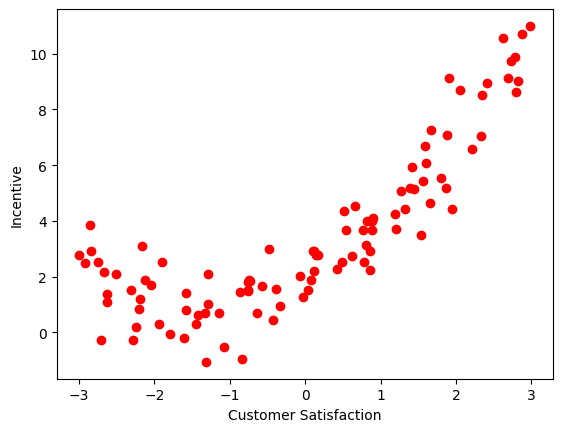

In [7]:
plt.scatter(df["Customer Satisfaction"], df["Incentive"], color = "r")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [8]:
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 15)

In [9]:
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
regression = LinearRegression()

In [12]:
regression.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred = regression.predict(X_test)

In [14]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [17]:
score = r2_score(y_test, y_pred)

In [18]:
print("r2 score: ", score)

r2 score:  0.2705652535622243


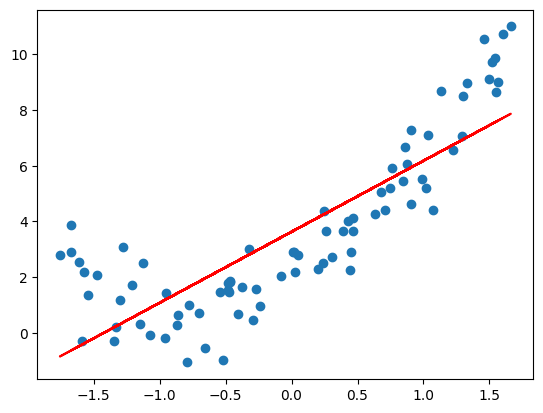

In [19]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = "r")
plt.show()

In [20]:
poly = PolynomialFeatures(degree = 2, include_bias=True)

In [30]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [31]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [32]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print("r2 score: ", score)

r2 score:  0.7685687698788558


In [35]:
regression.coef_


array([0.        , 2.63871762, 1.54959954])

In [36]:
regression.intercept_

np.float64(2.07667642979328)

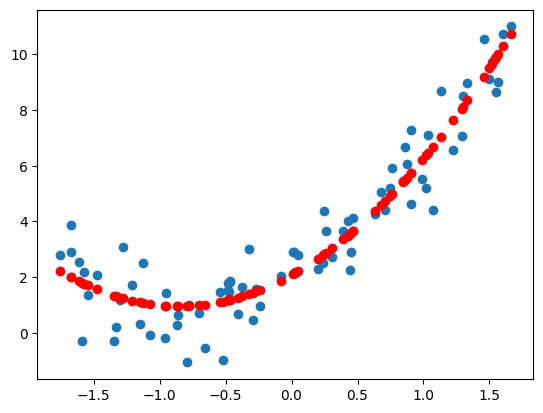

In [38]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "r")
plt.show()

In [39]:
poly = PolynomialFeatures(degree = 3, include_bias=True)

In [40]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [41]:
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print("r2 score: ", score)

r2 score:  0.7573443621401051


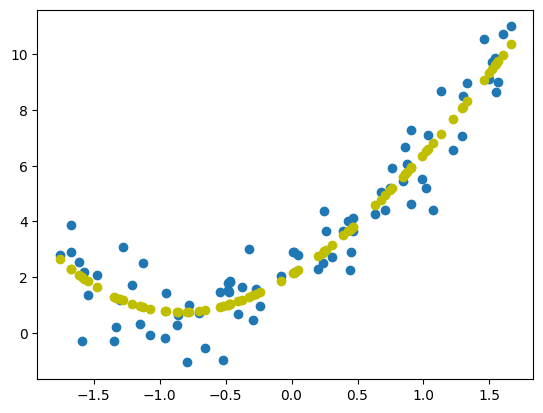

In [44]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color = "y")
plt.show()

In [45]:
# new data 

In [46]:
new_df = pd.read_csv("3-newdatas.csv")

In [47]:
new_df

,0
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [49]:
new_df.rename(columns = {"0": "Customer Satisfaction"}, inplace = True)

In [50]:
new_df

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [51]:
X_new = new_df[["Customer Satisfaction"]]

In [52]:
X_new

,Customer Satisfaction
0,-3.000000
1,-2.969849
2,-2.939698
3,-2.909548
4,-2.879397
...,...
195,2.879397
196,2.909548
197,2.939698
198,2.969849


In [53]:
X_new = scaler.fit_transform(X_new)

In [54]:
X_new_poly = poly.transform(X_new)

In [55]:
y_new = regression.predict(X_new_poly)

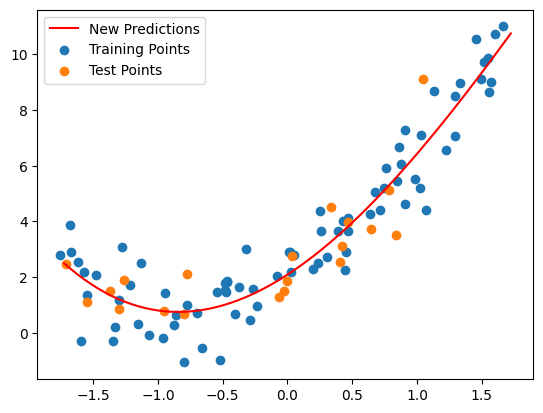

In [56]:
plt.plot(X_new, y_new, "r", label = "New Predictions")
plt.scatter(X_train, y_train, label = "Training Points")
plt.scatter(X_test, y_test, label = "Test Points")
plt.legend()
plt.show()

In [57]:
# pipeline 

In [74]:
def poly_regression(degree): 
    poly_features = PolynomialFeatures(degree = degree)
    scaler = StandardScaler()
    lin_reg = LinearRegression()
    pipeline = Pipeline([
        ("standart_scaler", scaler),
        ("poly_features", poly_features), 
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label = "New Predictions")
    plt.scatter(X_train, y_train, label = "Training Points")
    plt.scatter(X_test, y_test, label = "Test Points")
    plt.legend()
    plt.show()

R2 score:  0.27056525356222416


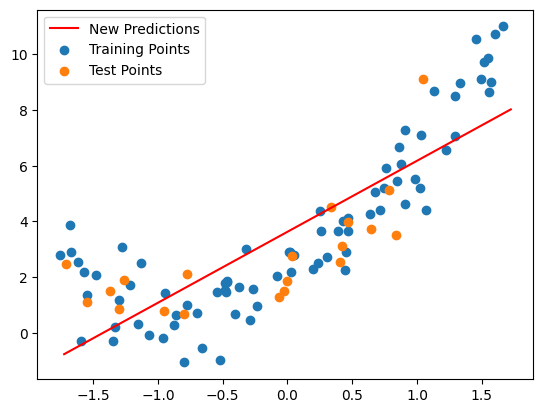

R2 score:  0.7685687698788558


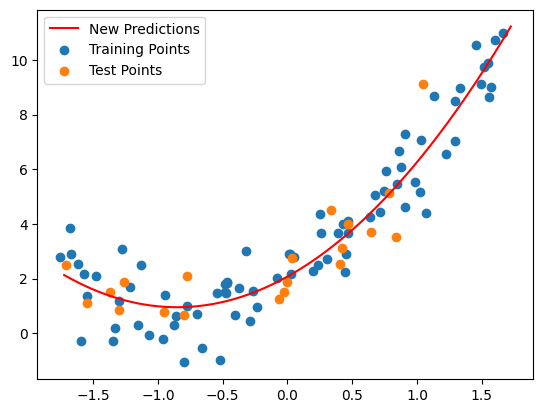

R2 score:  0.7573443621401051


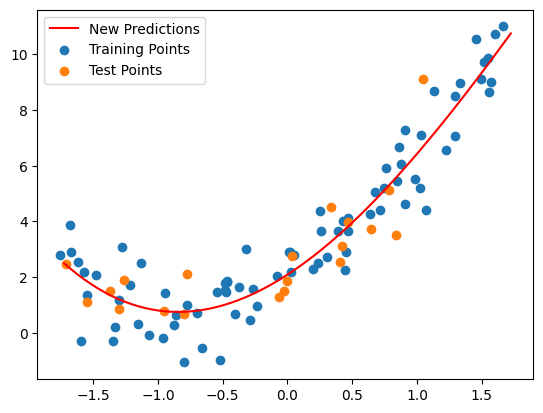

R2 score:  0.7355034443260418


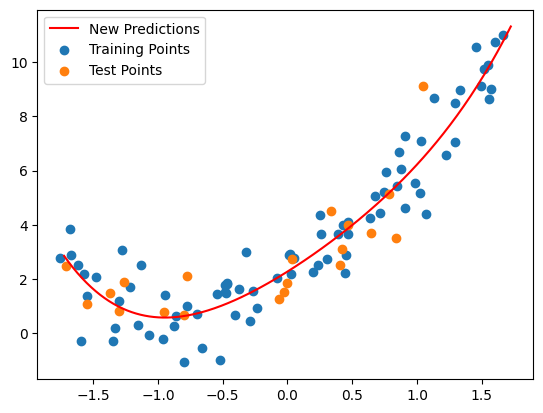

R2 score:  0.7351244165095403


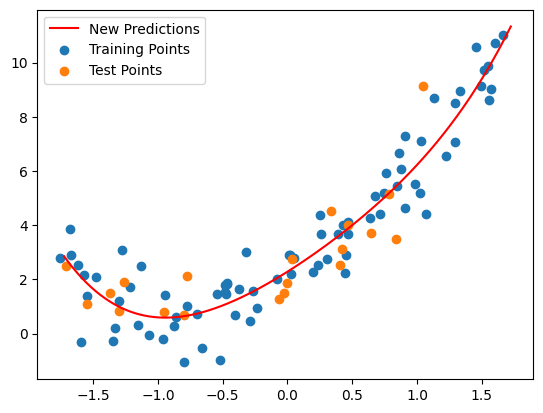

R2 score:  0.7343590482133427


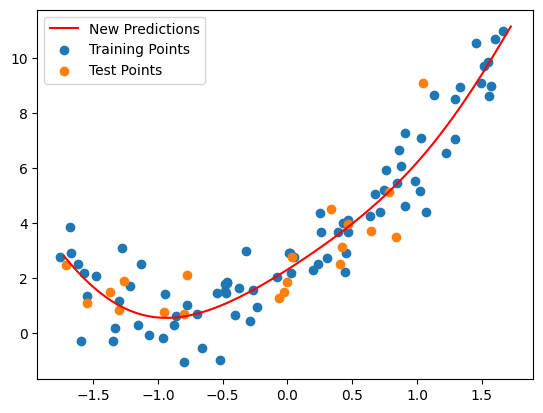

R2 score:  0.7347819263549453


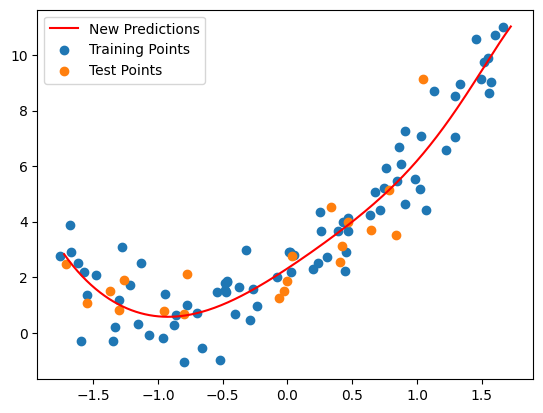

R2 score:  0.7411422099998388


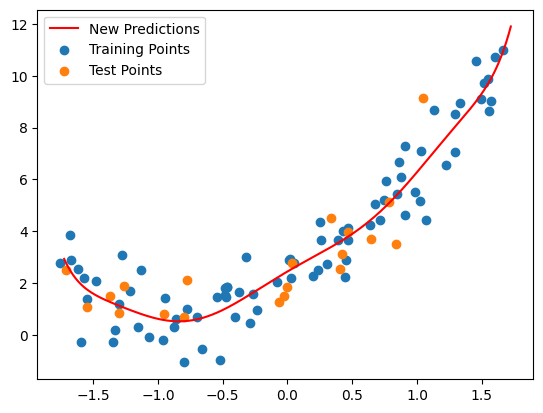

R2 score:  0.7310763879815905


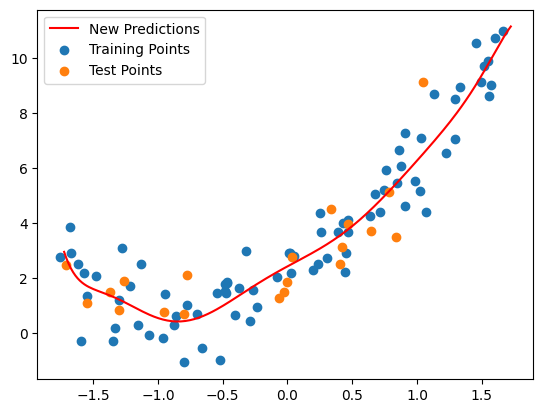

R2 score:  0.7280578621232858


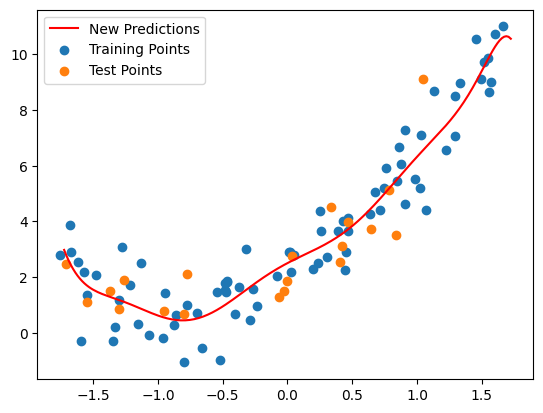

In [75]:
for degree in [1,2,3,4,5,6,7,8,9,10]: 
    poly_regression(degree)

In [76]:
# new predictions are going to be precise. 

In [77]:
# it can lead to overfitting 